In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier 

In [2]:
data = load_digits()

target = data['target']
data = data['data']

In [3]:
data.shape, target.shape

((1797, 64), (1797,))

In [4]:
cv = 10

def write_answer(val, num):
    with open("forest_{}.txt".format(num), "w") as f:
        f.write(str(val))

In [5]:
model_tree = DecisionTreeClassifier()
scorer = cross_val_score(model_tree, X=data, y=target, cv=cv).mean()
scorer

0.827089092317529

In [8]:
write_answer(scorer, 1)

In [7]:
num_trees = 100

model_tree = DecisionTreeClassifier()
bagging = BaggingClassifier(model_tree, n_estimators=num_trees, random_state=0)
scorer_2 = cross_val_score(bagging, X=data, y=target, cv=cv).mean()
scorer_2 

0.9243136920825039

In [9]:
write_answer(scorer_2, 2)

In [10]:
model_tree = DecisionTreeClassifier()
bagging = BaggingClassifier(model_tree, n_estimators=num_trees, random_state=0, max_features=int(np.sqrt(data.shape[1])))
scorer_3 = cross_val_score(bagging, X=data, y=target, cv=cv).mean()
scorer_3

0.9365281294303756

In [11]:
write_answer(scorer_3, 3)

In [12]:
model_tree = DecisionTreeClassifier(max_features=int(np.sqrt(data.shape[1])))
bagging = BaggingClassifier(model_tree, n_estimators=num_trees, random_state=0)
scorer_4 = cross_val_score(bagging, X=data, y=target, cv=cv).mean()
scorer_4

0.9544773623165452

In [13]:
write_answer(scorer_4, 4)

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
rand_tree = RandomForestClassifier(max_features=int(np.sqrt(data.shape[1])))
bagg = BaggingClassifier(rand_tree, n_estimators=num_trees, random_state=0)
scorer_rand = cross_val_score(bagg, X=data, y=target, cv=cv).mean()
scorer_rand

0.9482849223801668

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import clear_output

In [18]:
num_trees = [20,60,100,140,180, 'red']
max_features = [int(data.shape[1]/6), int(data.shape[1]/5), int(data.shape[1]/4), int(data.shape[1]/3), int(data.shape[1]/2), 'blue']
max_depth = [5, 10, 25, 45, 75, 'green']

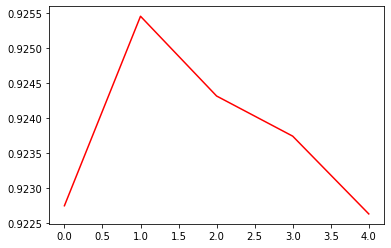

In [27]:
score = []
for num in num_trees[:5]:
    model_tree = DecisionTreeClassifier()
    bagging = BaggingClassifier(model_tree, n_estimators=num, random_state=0)
    score.append(cross_val_score(bagging, X=data, y=target, cv=cv).mean())
    clear_output(True)
    plt.plot(score, color=num_trees[5])
    plt.show()

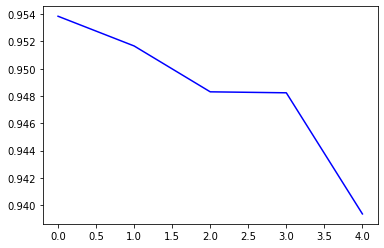

In [28]:
score = []
for features in max_features[:5]:
    model_tree = DecisionTreeClassifier(max_features=features)
    bagging = BaggingClassifier(model_tree, n_estimators=60, random_state=0)
    score.append(cross_val_score(bagging, X=data, y=target, cv=cv).mean())
    clear_output(True)
    plt.plot(score, color=max_features[5])
    plt.show()

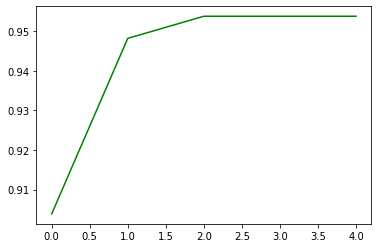

In [31]:
score = []
for depth in max_depth[:5]:
    model_tree = DecisionTreeClassifier(max_features=max_features[0], max_depth=depth)
    bagging = BaggingClassifier(model_tree, n_estimators=60, random_state=0)
    score.append(cross_val_score(bagging, X=data, y=target, cv=cv).mean())
    clear_output(True)
    plt.plot(score, color=max_depth[5])
    plt.show()

In [33]:
with open("forest_5.txt", "w") as f:
    f.write('2 3 4 7')